# Creating a Neural Network to predict credit card transaction fraud

## Introduction

Cybersecurity is an important topic in today's world - an important aspect of the digital aspect of our lives is securing funds and our financial assetes - those include credit/debit cards and our bank account credentials. In this project, I am attempting to prototype and test a Neural Network capable of detecting whether a transaction is fraudulent or not. I will be using Keras as an API to TensorFlow and basic pandas data manipulation skills. In this particular case, I will be developing a binary classification model.

## Database

Database has been downloaded from kaggle - **[database link](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)**
Contained data include an **id**, **28 columns** containing numbers that represent various **transaction details**, **amount of funds** transferred and wether the transaction was a **scam or not**. We need to scale the values using standard scaler and extract the label from "Class" column.

## Imports and overview

Here I import the necessary modules, read the database using pandas and initially check the data in the database.

In [2]:
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

CreditDataRaw = pd.read_csv('archive/creditcard_2023.csv')

CreditDataRaw.head()

2023-10-25 19:39:12.581402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## Checking the shape

It is beneficial to know the amount of records we are working on in our project, that's what the shape attribute is for.

In [3]:
CreditDataRaw.shape

(568630, 31)

## Checking the bias

In most machine learning models, we have to take into account the amount of rows of each label in our data, we have to check how many transactions from our dataset were fraudulent and how many were not

In [4]:
CreditDataRaw["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

## Checking the null values

Okay, now that we know that the classes are equally represented in the dataset, it would be recommended to check for null fields to make sure our data is clean.

In [5]:
CreditDataRaw.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Transforming data in the dataset

Wonderful, that means our data is clean and ready to be transformed into a form suitable for a NN. I will be applying **StandardScaler()** function to the columns contating the transaction details and amount.

In [6]:
ColumsToScale = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11",\
                "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21",\
                "V22","V23", "V24", "V25", "V26", "V27", "V28", "Amount"]

PreProcessor = make_column_transformer(\
    (StandardScaler(), ColumsToScale))

y = CreditDataRaw.copy().pop('Class')

X = CreditDataRaw

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = PreProcessor.fit_transform(X_train)

X_valid = PreProcessor.transform(X_valid)

## Defining our model

Now that we have our data in the correct form, time to define a model for our data. I'll be using common Neural network layers with 256 neurons each, using activations like ReLU for pattern detection and Sigmoid for classification. I will also utilize batch normalization for training stability and early stopping to ensure maximum possible model accuracy.

In [7]:
model = keras.Sequential([\
    keras.layers.BatchNormalization(input_shape=[29]),\
    keras.layers.Dense(256, activation='relu'),\
    keras.layers.Dense(256, activation='relu'),\
    keras.layers.Dense(256, activation='relu'),\
    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',\
    loss='binary_crossentropy',\
    metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

## Traning our model

Time to make that model learn on the data, I'll be using 30 epochs for this training with the batch size of 2048.

Epoch 1/30
209/209 [==============================] - 5s 17ms/step - loss: 0.0625 - binary_accuracy: 0.9782 - val_loss: 0.0141 - val_binary_accuracy: 0.9957
Epoch 2/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0080 - binary_accuracy: 0.9979 - val_loss: 0.0049 - val_binary_accuracy: 0.9989
Epoch 3/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0042 - binary_accuracy: 0.9990 - val_loss: 0.0029 - val_binary_accuracy: 0.9996
Epoch 4/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0029 - binary_accuracy: 0.9993 - val_loss: 0.0026 - val_binary_accuracy: 0.9994
Epoch 5/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0023 - binary_accuracy: 0.9995 - val_loss: 0.0021 - val_binary_accuracy: 0.9995
Epoch 6/30
209/209 [==============================] - 3s 16ms/step - loss: 0.0027 - binary_accuracy: 0.9993 - val_loss: 0.0032 - val_binary_accuracy: 0.9992
Epoch 7/30
209/209 [==============================] - 3s 1

<Axes: >

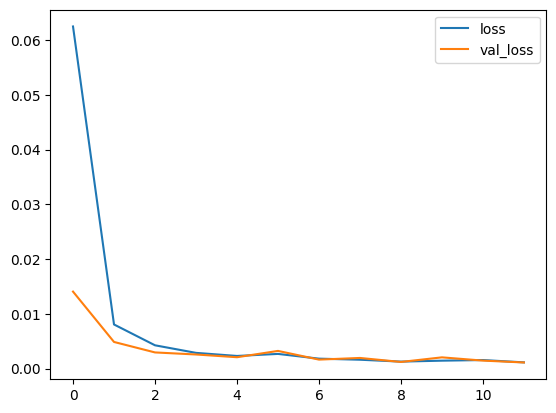

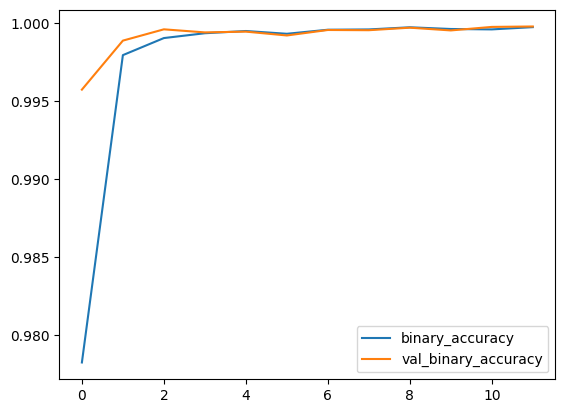

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=2048,
    epochs=30,
    callbacks=[early_stopping],
)

import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)


# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()


## Testing the trained model

After training our model, we should now test a few examples whether it correctly classifies the data.

In [10]:
for i in range(40):
    row = X_valid[i]
    print(y_valid.iloc[i])
    print(str(i) + ". " + "Predicted: " + ("Fraud" if model.predict(row.reshape(1, -1)) > 0.5 else "Not Fraud"))
    print(str(i) + ". " + "Actual: " + ("Fraud" if y_valid.iloc[i] == 1 else "Not Fraud"))


0
1/1 [==============================] - 0s 104ms/step
0. Predicted: Not Fraud
0. Actual: Not Fraud
1
1/1 [==============================] - 0s 22ms/step
1. Predicted: Fraud
1. Actual: Fraud
0
1/1 [==============================] - 0s 22ms/step
2. Predicted: Not Fraud
2. Actual: Not Fraud
0
1/1 [==============================] - 0s 20ms/step
3. Predicted: Not Fraud
3. Actual: Not Fraud
0
1/1 [==============================] - 0s 20ms/step
4. Predicted: Not Fraud
4. Actual: Not Fraud
1
1/1 [==============================] - 0s 20ms/step
5. Predicted: Fraud
5. Actual: Fraud
0
1/1 [==============================] - 0s 24ms/step
6. Predicted: Not Fraud
6. Actual: Not Fraud
0
1/1 [==============================] - 0s 20ms/step
7. Predicted: Not Fraud
7. Actual: Not Fraud
1
1/1 [==============================] - 0s 22ms/step
8. Predicted: Fraud
8. Actual: Fraud
0
1/1 [==============================] - 0s 19ms/step
9. Predicted: Not Fraud
9. Actual: Not Fraud
0
1/1 [==========================